In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf

In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [4]:
for dirname, _, filename in os.walk('/fruit_images'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [5]:
train_path=("fruit_images\\fruits-360_dataset\\fruits-360\\Training")
val_path=("fruit_images\\fruits-360-original-size\\fruits-360-original-size\\Validation")
test_path=("fruit_images\\fruits-360_dataset\\fruits-360\\Test")

In [6]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.0,
                                                             rotation_range=30,
                                                             width_shift_range=0.2,
                                                             height_shift_range=0.2,
                                                             shear_range=0.2,
                                                             zoom_range=0.2,
                                                             horizontal_flip=True)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [7]:
train_set=train_datagen.flow_from_directory(train_path,
                                           target_size=(100,100),
                                           batch_size=64,
                                           class_mode='categorical')
val_set=test_datagen.flow_from_directory(val_path,
                                        target_size=(100,100),
                                        batch_size=64,
                                        class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_path,
                                         target_size=(100,100),
                                         batch_size=64,
                                         class_mode='categorical')

Found 67692 images belonging to 131 classes.
Found 3114 images belonging to 24 classes.
Found 22688 images belonging to 131 classes.


In [8]:
len(train_set)

1058

In [9]:
len(test_set)

355

In [9]:
len(val_set)

49

In [10]:
num_classes=len(train_set.class_indices)
print("Number of clsses:",num_classes)

labels=(train_set.class_indices)
labels=dict((v,k) for k,v in labels.items())
print(labels)

Number of clsses: 131
{0: 'Apple Braeburn', 1: 'Apple Crimson Snow', 2: 'Apple Golden 1', 3: 'Apple Golden 2', 4: 'Apple Golden 3', 5: 'Apple Granny Smith', 6: 'Apple Pink Lady', 7: 'Apple Red 1', 8: 'Apple Red 2', 9: 'Apple Red 3', 10: 'Apple Red Delicious', 11: 'Apple Red Yellow 1', 12: 'Apple Red Yellow 2', 13: 'Apricot', 14: 'Avocado', 15: 'Avocado ripe', 16: 'Banana', 17: 'Banana Lady Finger', 18: 'Banana Red', 19: 'Beetroot', 20: 'Blueberry', 21: 'Cactus fruit', 22: 'Cantaloupe 1', 23: 'Cantaloupe 2', 24: 'Carambula', 25: 'Cauliflower', 26: 'Cherry 1', 27: 'Cherry 2', 28: 'Cherry Rainier', 29: 'Cherry Wax Black', 30: 'Cherry Wax Red', 31: 'Cherry Wax Yellow', 32: 'Chestnut', 33: 'Clementine', 34: 'Cocos', 35: 'Corn', 36: 'Corn Husk', 37: 'Cucumber Ripe', 38: 'Cucumber Ripe 2', 39: 'Dates', 40: 'Eggplant', 41: 'Fig', 42: 'Ginger Root', 43: 'Granadilla', 44: 'Grape Blue', 45: 'Grape Pink', 46: 'Grape White', 47: 'Grape White 2', 48: 'Grape White 3', 49: 'Grape White 4', 50: 'Grapef

In [11]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding="same",input_shape=(100,100,3),
                          activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64,(3,3),padding="same",input_shape=(100,100,3),
                          activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128,(3,3),padding="same",input_shape=(100,100,3),
                          activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(131,activation="softmax")
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 64)       2

In [13]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.RMSprop(),
             metrics=["accuracy"])

In [20]:
history=model.fit(train_set,
                 steps_per_epoch=50,
                 epochs=30,
                 validation_data=test_set,
                 validation_steps=200)

Epoch 1/30
50/50 [==============================] - 93s 2s/step - loss: 0.2945 - accuracy: 0.9100 - val_loss: 0.4608 - val_accuracy: 0.8748
Epoch 2/30
50/50 [==============================] - 55s 1s/step - loss: 0.2468 - accuracy: 0.9316 - val_loss: 0.3404 - val_accuracy: 0.8973
Epoch 3/30
50/50 [==============================] - 36s 716ms/step - loss: 0.2211 - accuracy: 0.9322 - val_loss: 0.3096 - val_accuracy: 0.9213
Epoch 4/30
50/50 [==============================] - 25s 497ms/step - loss: 0.2431 - accuracy: 0.9256 - val_loss: 0.5438 - val_accuracy: 0.8631
Epoch 5/30
50/50 [==============================] - 21s 417ms/step - loss: 0.2271 - accuracy: 0.9319 - val_loss: 0.4593 - val_accuracy: 0.8726
Epoch 6/30
50/50 [==============================] - 22s 448ms/step - loss: 0.2193 - accuracy: 0.9347 - val_loss: 0.2485 - val_accuracy: 0.9341
Epoch 7/30
50/50 [==============================] - 22s 435ms/step - loss: 0.2260 - accuracy: 0.9291 - val_loss: 0.3233 - val_accuracy: 0.9152
Epoch

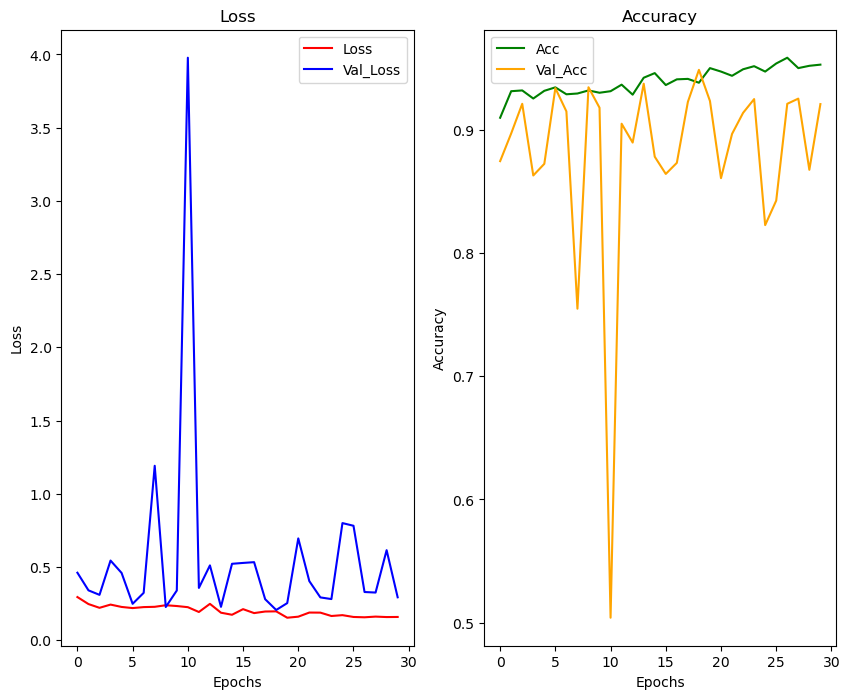

In [21]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss', color='red')
plt.plot(history.history['val_loss'], label='Val_Loss', color='blue')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Acc', color='green')
plt.plot(history.history['val_accuracy'], label='Val_Acc', color='orange')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


2/2 [==============================] - 1s 5ms/step


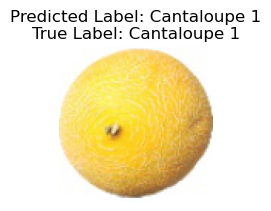

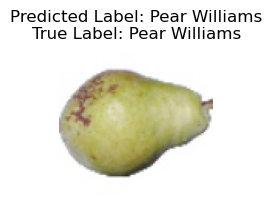

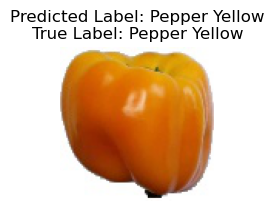

In [22]:
test_images, test_labels = next(test_set)
predictions = model.predict(test_images)

for i in range(3):
    predicted_label_index = np.argmax(predictions[i])
    predicted_label = labels[predicted_label_index]
    true_label_index = np.argmax(test_labels[i])
    true_label = labels[true_label_index]
    
    plt.figure(figsize=(2,2))
    plt.imshow(test_images[i])
    plt.title(f'Predicted Label: {predicted_label}\nTrue Label: {true_label}')
    plt.axis('off')
    plt.show()

In [23]:
model.save(os.path.join('models','final.h5'))

In [24]:
print(predictions)

[[5.8680693e-23 1.4135764e-19 5.3418742e-17 ... 3.8494716e-17
  1.3286029e-16 1.5556849e-15]
 [1.0023752e-09 3.7646131e-09 4.2627457e-11 ... 3.3728041e-11
  7.7072532e-12 2.5222008e-10]
 [1.1202918e-20 1.2327300e-20 3.9417162e-18 ... 3.0752671e-11
  2.2719245e-14 1.8800586e-12]
 ...
 [7.8382722e-17 5.4209759e-22 1.6094068e-17 ... 1.8826822e-13
  1.4488807e-14 4.2161438e-16]
 [1.7864458e-06 4.4860299e-06 3.0304145e-07 ... 6.1942643e-08
  4.9540316e-10 4.0006063e-12]
 [1.4499206e-09 3.1049123e-20 4.2961464e-14 ... 2.9212201e-17
  3.6374631e-15 1.8813489e-14]]
